In [2]:
import os
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils import *
from cVAE_utils import *
from cVAE_trainer import *

/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user

# ALL-250000_1_100-10

In [3]:
alpha=250000
beta=1
gamma=100

In [4]:
state_dict_path = "3DcVAE_asd-UKBB604-dim32/ALL-train_480-val_120-HP-alpha_250000-beta_1-gamma_100-batch_size_10-Exp1/model_last.pth"
state_dict = torch.load(state_dict_path)

In [5]:
train_history = state_dict["train_info_history"]
val_history = state_dict["val_info_history"]

print(state_dict.keys())
print(train_history.keys())
print(val_history.keys())

dict_keys(['model', 'optimizer', 'epoch', 'best_loss', 'bad_epochs', 'val_info_history', 'train_info_history'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss', 'ss', 'ss-plot'])


## train/val loss + ss

In [41]:
loss_train = train_history["loss"]
loss_val = val_history["loss"]
ss_plot = val_history["ss"]
epochs = np.arange(0, len(loss_train)) 

print(len(loss_train))
print(len(loss_val))
print(len(ss_plot))
print(len(epochs))

print(loss_train[220:230])
print(loss_val[220:230])
print(ss_plot[:10])
print(epochs[:10])
print()

print(np.array(ss_plot).min())
print(np.array(ss_plot).max())
print()

print(ss_plot[456])

457
457
457
457
[6576.0380859375, 6570.84716796875, 6563.720703125, 6557.8251953125, 6547.29052734375, 5431.27490234375, 2421.029296875, 2317.51708984375, 2284.594482421875, 2262.83544921875]
[6576.009765625, 6571.09716796875, 6561.66015625, 6553.6787109375, 6540.7919921875, 2953.52099609375, 2352.55517578125, 2313.314208984375, 2301.74169921875, 2266.6181640625]
[-0.067462154, -0.06821032, -0.066322036, -0.06624697, -0.06511578, -0.06691992, -0.06881964, -0.06987604, -0.06880997, -0.07033204]
[0 1 2 3 4 5 6 7 8 9]

-0.07528901
0.0



IndexError: list index out of range

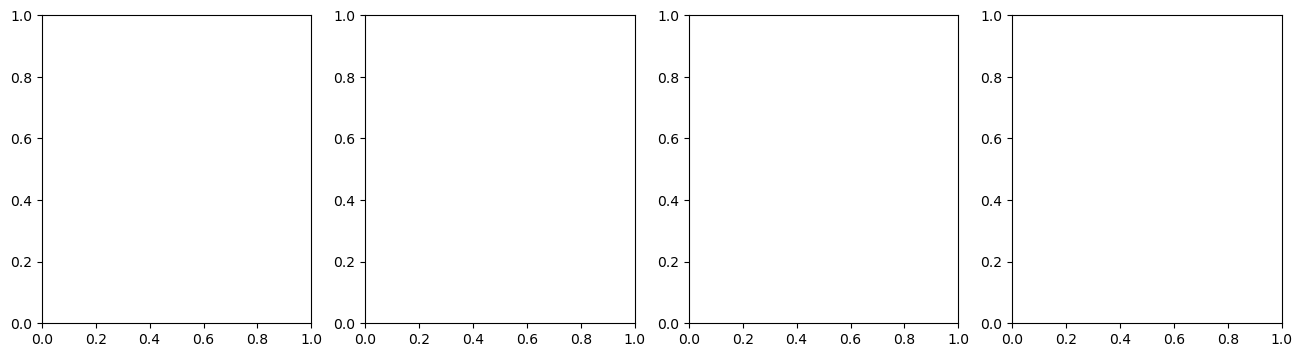

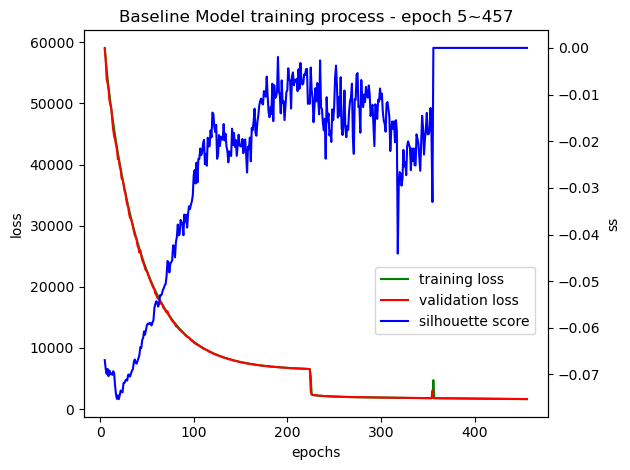

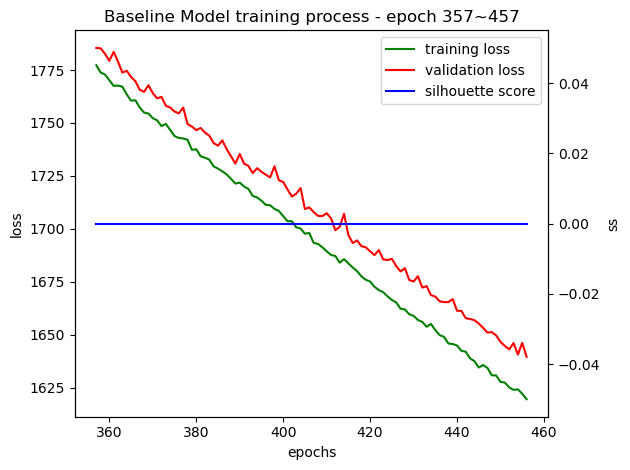

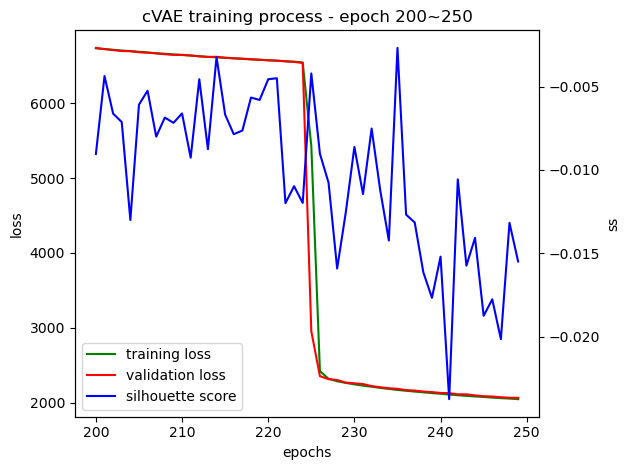

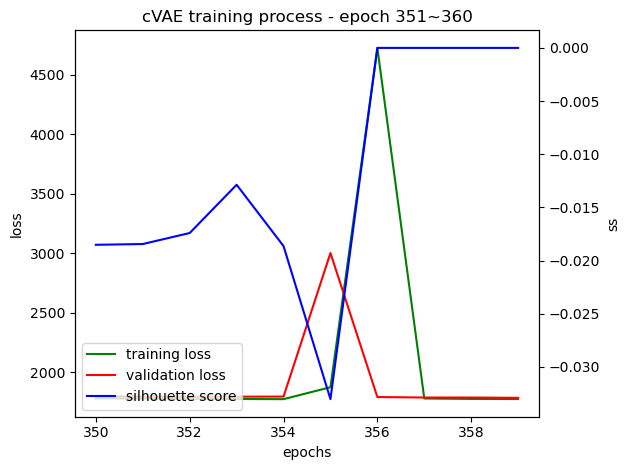

In [7]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center", bbox_to_anchor=(0.8,0.3))

plt.title(f'Baseline Model training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 357
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'Baseline Model training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 200
right = 250

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 350
right = 360

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

plt.title(f'cVAE training process - epoch {left+1}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

In [8]:
print(loss_train[354:359])
print(loss_val[354:359])

[1771.6585693359375, 1872.0833740234375, 4726.2529296875, 1777.265869140625, 1773.837890625]
[1793.30419921875, 3001.174560546875, 1789.447021484375, 1785.451904296875, 1785.2581787109375]


## train/val loss zoom in

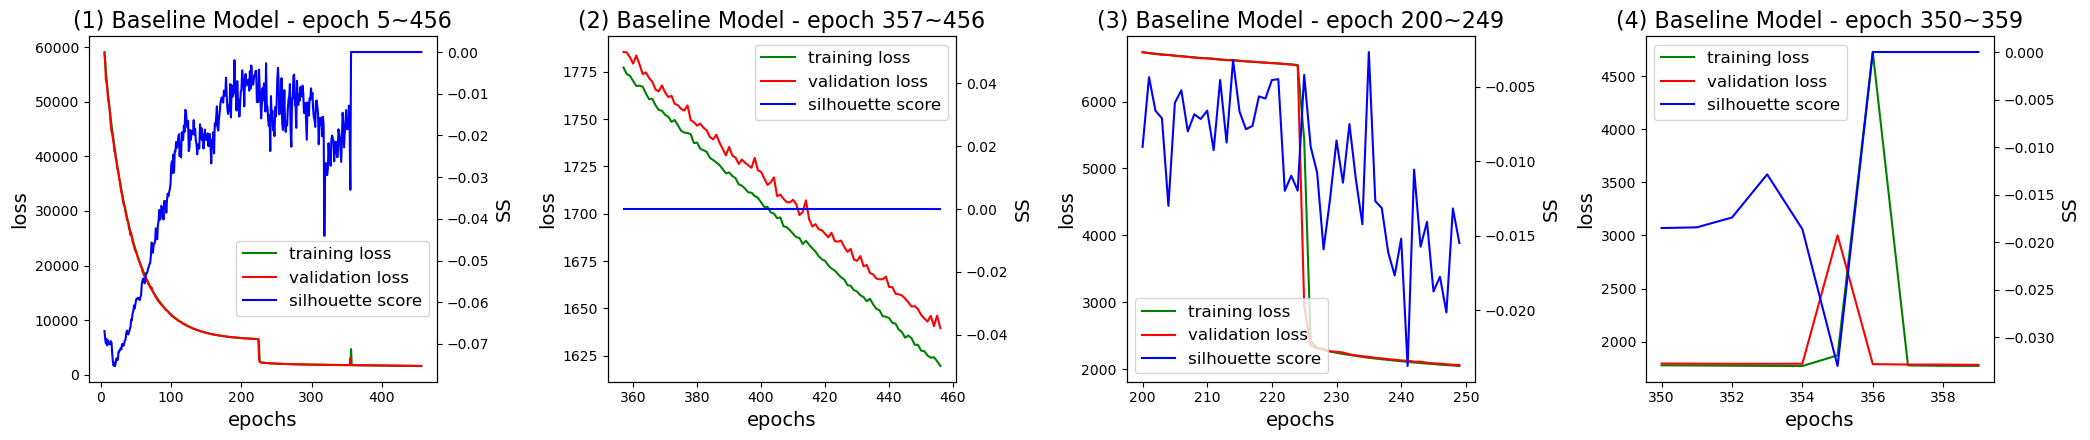

In [35]:
fig, (ax1,ax3,ax4,ax5) = plt.subplots(1,4,figsize=(21,4.5))
title_size = 16
label_size = 14
legend_size = 12
## ---------------------------------------------------------------
left = 5
right = len(epochs)

lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss', size=label_size)
ax1.set_xlabel('epochs', size=label_size)

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('SS', size=label_size)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center", bbox_to_anchor=(0.7,0.3), fontsize=legend_size)

ax1.set_title(f'(1) Baseline Model - epoch {left}~{right-1}', size=title_size)

## ---------------------------------------------------------------
left = 357
right = len(epochs)

# fig, ax1 = plt.subplots()
lns1 = ax3.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax3.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax3.set_ylabel('loss', size=label_size)
ax3.set_xlabel('epochs', size=label_size)

ax2 = ax3.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('SS', size=label_size)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, fontsize=legend_size)

ax3.set_title(f'(2) Baseline Model - epoch {left}~{right-1}', size=title_size)

## ---------------------------------------------------------------
left = 200
right = 250

lns1 = ax4.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax4.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax4.set_ylabel('loss', size=label_size)
ax4.set_xlabel('epochs', size=label_size)

ax2 = ax4.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('SS', size=label_size)

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax4.legend(lns, labs, loc=3, fontsize=legend_size)

ax4.set_title(f'(3) Baseline Model - epoch {left}~{right-1}', size=title_size)

## ---------------------------------------------------------------
left = 350
right = 360

# fig, ax1 = plt.subplots()
lns1 = ax5.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax5.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax5.set_ylabel('loss', size=label_size)
ax5.set_xlabel('epochs', size=label_size)

ax2 = ax5.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('SS', size=label_size)

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax5.legend(lns, labs, loc="upper left", fontsize=legend_size)

ax5.set_title(f'(4) Baseline Model - epoch {left}~{right-1}', size=title_size)

fig.tight_layout()
plt.savefig("./analysis/baseline-overall")
plt.show()

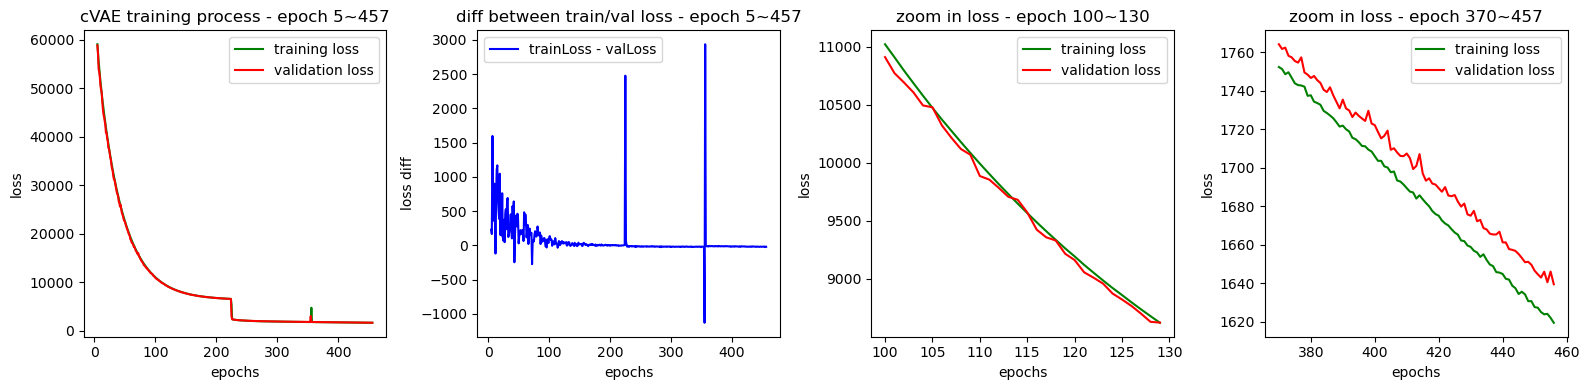

In [10]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))
#fig, (ax1) = plt.subplots()

left = 5
right = len(epochs)
ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
ax1.legend()
ax1.set_title(f'cVAE training process - epoch {left}~{right}')

left = 5
right = len(epochs)
ax2.plot(epochs[left:right], np.array(loss_train[left:right]) - np.array(loss_val[left:right]), label='trainLoss - valLoss', color='b')
ax2.set_ylabel('loss diff')
ax2.set_xlabel('epochs')
ax2.legend()
ax2.set_title(f'diff between train/val loss - epoch {left}~{right}')

left = 100
right = 130
ax3.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax3.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax3.set_ylabel('loss')
ax3.set_xlabel('epochs')
ax3.legend()
ax3.set_title(f'zoom in loss - epoch {left}~{right}')

left = 370
right = len(epochs)
ax4.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax4.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax4.set_ylabel('loss')
ax4.set_xlabel('epochs')
ax4.legend()
ax4.set_title(f'zoom in loss - epoch {left}~{right}')

fig.tight_layout()
plt.savefig("./teams/dif1.png")
plt.show()

## Train loss

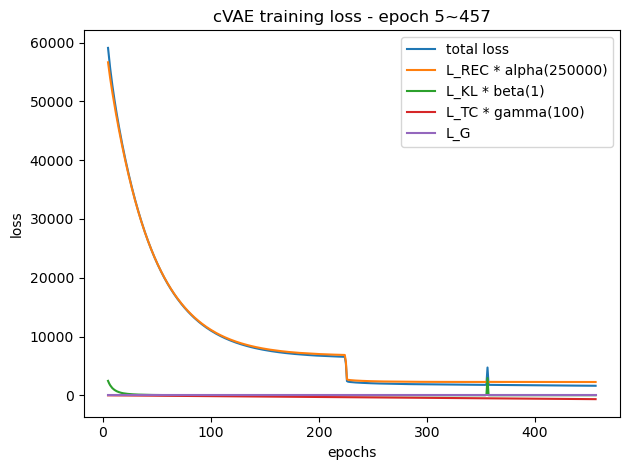

In [11]:
# alpha=250000
# beta=1
# gamma=100

left = 5
right = len(epochs)

## 'loss'
plt.plot(epochs[left:right], train_history["loss"][left:right] , label='total loss')

## "reconst_loss", alpha=250000
## 'reconst_loss_tg', 'reconst_loss_bg'
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right] / (160 * 192 * 160) , label='reconst_train')
plt.plot(epochs[left:right], alpha * np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC * alpha({alpha})')

## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'
plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label='beta * KL_s_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label='beta * KL_z_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label='beta * KL_z_bg')

## 'TC_loss', gamma=100
# plt.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC_train')
plt.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})')

## 'discriminator_loss'
plt.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')

plt.title(f'cVAE training loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()

## Train REC loss

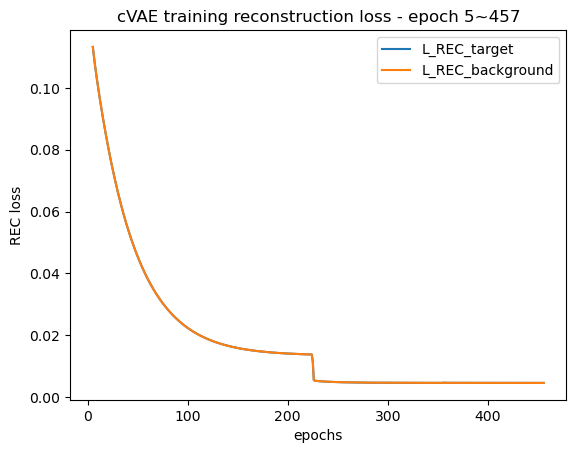

In [12]:
## "reconst_loss", alpha=250000
## 'reconst_loss_tg', 'reconst_loss_bg'
alpha=250000

## ---------------------------------------------------------------
left = 5
right = len(epochs)

#plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
# left = 175
# right = 200

# #plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

# plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
# plt.xlabel("epochs")
# plt.ylabel("REC loss")
# plt.legend()

# fig.tight_layout()
# plt.show()

In [13]:
print(np.array(train_history["reconst_loss_tg"])[0] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[-1] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[246] /  (160 * 192 * 160))

0.14230194091796874
0.004525465965270996
0.0048190685113271075


In [14]:
np.array(train_history["reconst_loss_tg"])[100] /  (160 * 192 * 160)

0.022299803098042806

In [15]:
np.array(train_history["reconst_loss_tg"])[200] /  (160 * 192 * 160)

0.014028580983479817

In [16]:
np.array(train_history["reconst_loss_tg"])[220:230] /  (160 * 192 * 160)

array([0.01376279, 0.01375756, 0.01374598, 0.01373458, 0.01371884,
       0.01148684, 0.00547103, 0.00526833, 0.00520481, 0.00516492])

In [17]:
np.array(train_history["reconst_loss_tg"])[250:] /  (160 * 192 * 160)

array([0.00477592, 0.00476967, 0.0047591 , 0.00474744, 0.00473925,
       0.00473673, 0.00472626, 0.00472149, 0.00471217, 0.00470405,
       0.00469912, 0.00469417, 0.00468619, 0.00468058, 0.00467479,
       0.00466876, 0.00466843, 0.00465907, 0.00465393, 0.00465075,
       0.00464455, 0.0046406 , 0.00463954, 0.0046327 , 0.00462784,
       0.00462324, 0.00462159, 0.00461831, 0.00461659, 0.00461184,
       0.00461117, 0.00460678, 0.00460437, 0.00459866, 0.00460396,
       0.00459655, 0.00459221, 0.0045899 , 0.00458868, 0.00458843,
       0.0045844 , 0.00458503, 0.00457861, 0.00457793, 0.00457776,
       0.00457867, 0.00457513, 0.00457115, 0.00457426, 0.00456953,
       0.00457204, 0.00456598, 0.00456415, 0.00456528, 0.00456372,
       0.00456193, 0.00455937, 0.00456035, 0.00455874, 0.00455746,
       0.00455815, 0.00455419, 0.00455572, 0.00455327, 0.00455312,
       0.00455334, 0.00455307, 0.00454954, 0.00455482, 0.00455792,
       0.00454914, 0.00454767, 0.00454998, 0.00454839, 0.00454

## Train KL loss

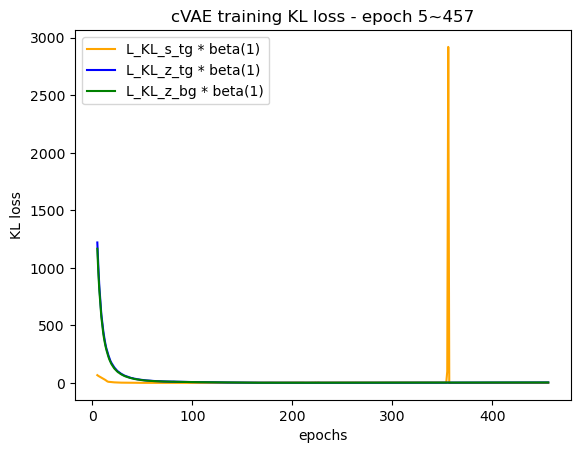

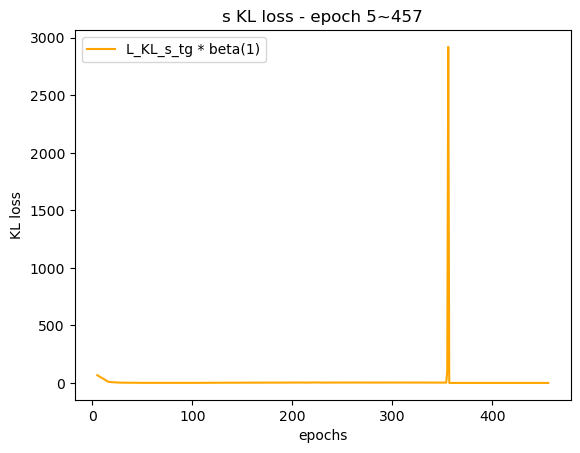

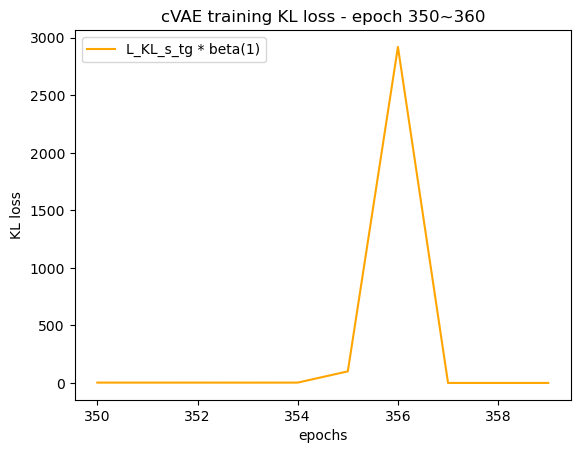

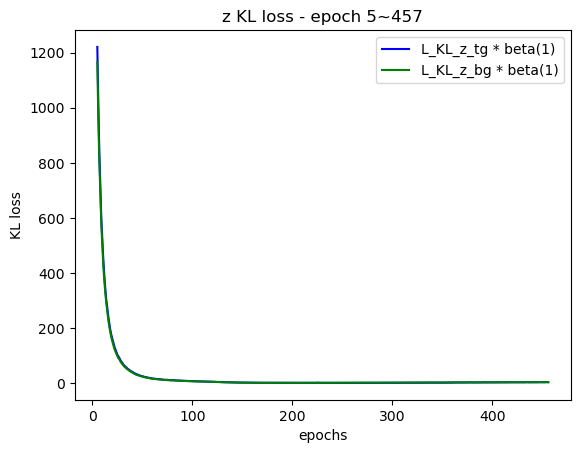

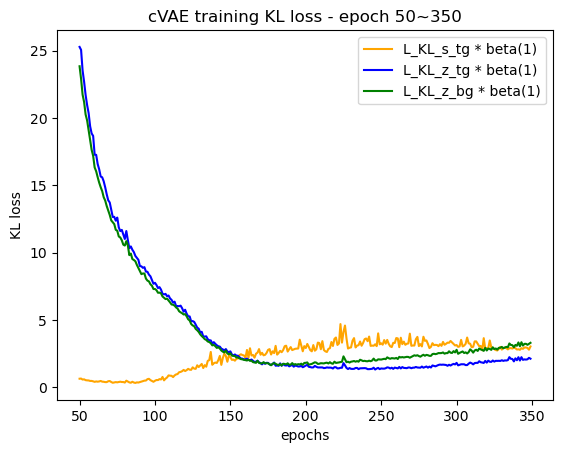

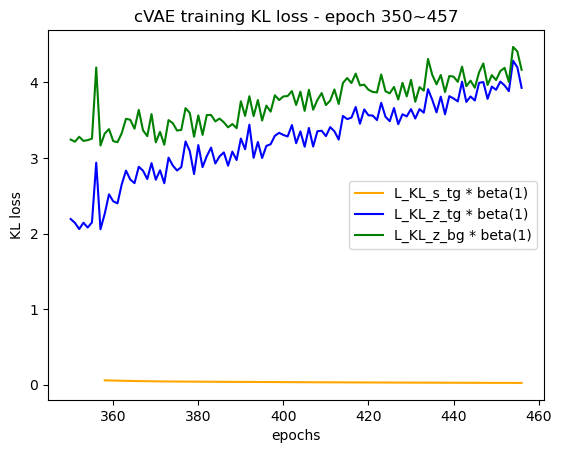

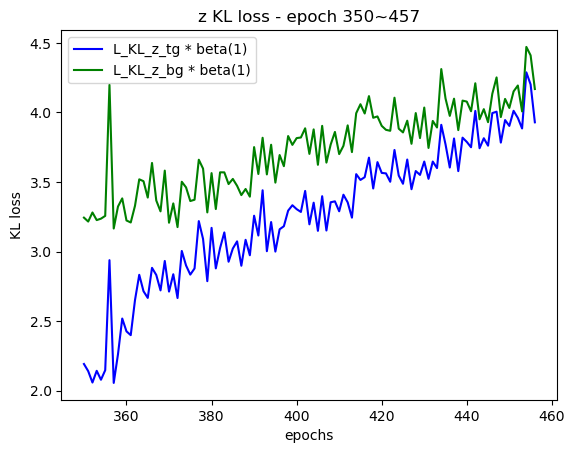

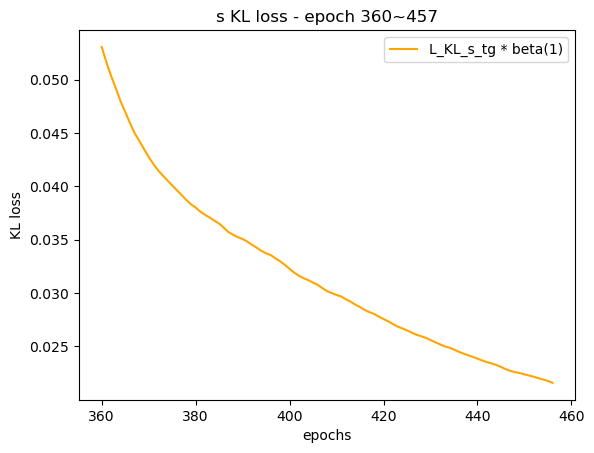

In [18]:
## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'
beta = 1

## ---------------------------------------------------------------
left = 5
right = len(epochs)
plt.title(f'cVAE training KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 5
right = len(epochs)
plt.title(f's KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 350
right = 360

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'cVAE training KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 5
right = len(epochs)
plt.title(f'z KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
#plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 50
right = 350
plt.title(f'cVAE training KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()


## ---------------------------------------------------------------
lefts = 358
leftz = 350
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[lefts:right], beta * np.array(train_history["KL_s_tg"])[lefts:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[leftz:right], beta * np.array(train_history["KL_z_tg"])[leftz:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[leftz:right], beta * np.array(train_history["KL_z_bg"])[leftz:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'cVAE training KL loss - epoch {leftz}~{right}')
plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 350
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'z KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 360
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f's KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("KL loss")
plt.legend()

fig.tight_layout()
plt.show()

In [19]:
np.array(train_history["KL_s_tg"])[357]

0.05760153755545616

In [20]:
np.array(train_history["KL_s_tg"])[70]

0.4768959879875183

In [21]:
np.array(train_history["KL_s_tg"])[356]

2920.112060546875

In [22]:
((np.array(train_history["KL_z_tg"])+np.array(train_history["KL_z_bg"])) / 2)[357:].max()

4.379674196243286

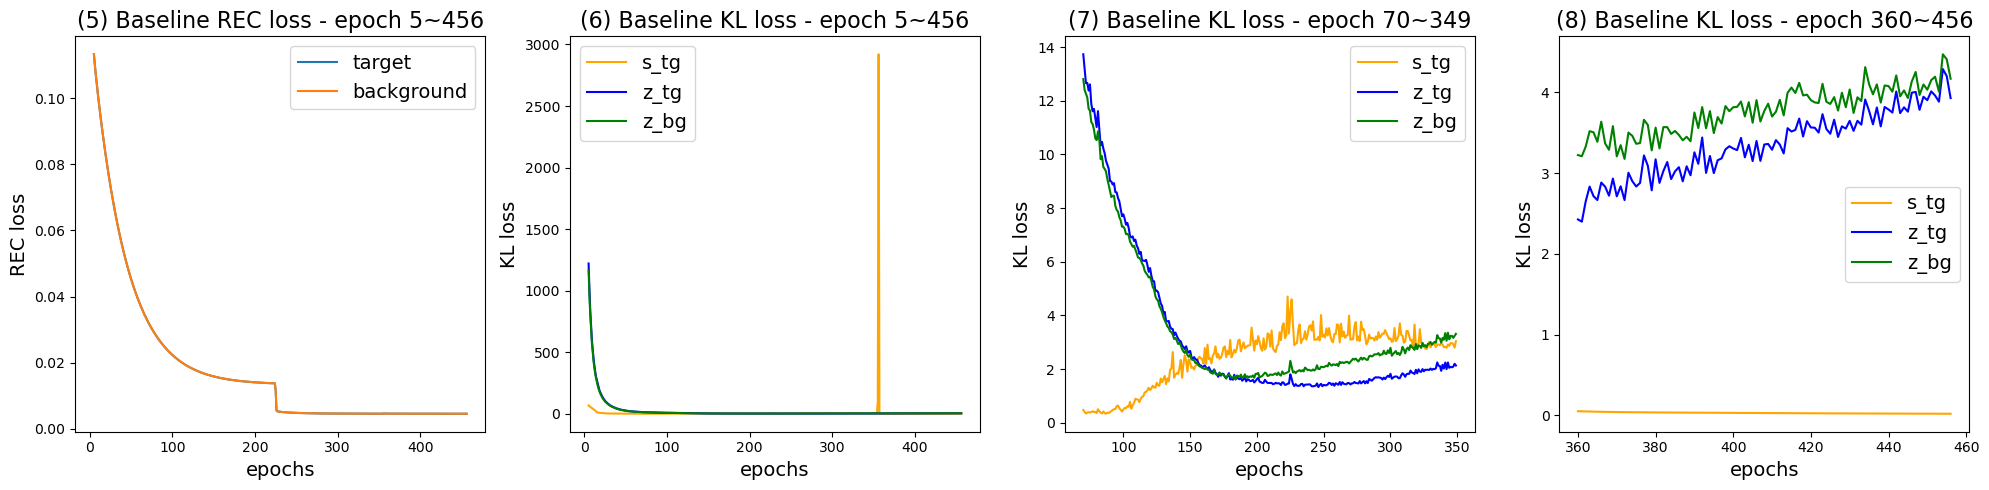

In [23]:
fig, ((ax0, ax1, ax5, ax6)) = plt.subplots(1,4,figsize=(20, 5))
title_size = 16
label_size = 14
legend_size = 14

left = 5
right = len(epochs)
ax0.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'target')
ax0.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'background')
ax0.set_title(f'(5) Baseline REC loss - epoch {left}~{right-1}', fontsize=title_size)
ax0.set_xlabel("epochs", fontsize=label_size)
ax0.set_ylabel("REC loss", fontsize=label_size)
ax0.legend(fontsize=legend_size)

left = 5
right = len(epochs)
ax1.set_title(f'(6) Baseline KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax1.set_xlabel("epochs", fontsize=label_size)
ax1.set_ylabel("KL loss", fontsize=label_size)
ax1.legend(fontsize=legend_size)

# left = 5
# right = len(epochs)
# ax2.set_title(f'z KL loss - epoch {left}~{right}')
# ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')
# ax2.set_xlabel("epochs")
# ax2.set_ylabel("KL loss")
# ax2.legend()


# left = 5
# right = len(epochs)
# ax3.set_title(f's KL loss - epoch {left}~{right}')
# ax3.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# ax3.set_xlabel("epochs")
# ax3.set_ylabel("KL loss")
# ax3.legend()

# left = 350
# right = 360
# ax4.set_title(f's KL loss - epoch {left}~{right}')
# ax4.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# ax4.set_xlabel("epochs")
# ax4.set_ylabel("KL loss")
# ax4.legend()

left = 70
right = 350
ax5.set_title(f'(7) Baseline KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax5.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax5.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax5.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax5.set_xlabel("epochs", fontsize=label_size)
ax5.set_ylabel("KL loss", fontsize=label_size)
ax5.legend(fontsize=legend_size)

left = 360
right = len(epochs)
ax6.set_title(f'(8) Baseline KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax6.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax6.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax6.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax6.set_xlabel("epochs", fontsize=label_size)
ax6.set_ylabel("KL loss", fontsize=label_size)
ax6.legend(fontsize=legend_size)

# left = 350
# right = len(epochs)
# ax7.set_title(f'z KL loss - epoch {left}~{right}')
# ax7.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# ax7.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')
# ax7.set_xlabel("epochs")
# ax7.set_ylabel("KL loss")
# ax7.legend()

# left = 360
# right = len(epochs)
# ax8.set_title(f's KL loss - epoch {left}~{right}')
# ax8.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# ax8.set_xlabel("epochs")
# ax8.set_ylabel("KL loss")

fig.tight_layout()
plt.savefig("./analysis/baseline-REC-KL")
plt.show()

In [24]:
print(np.array(train_history["KL_s_tg"])[150:200])

[2.25530529 2.04655623 2.07046318 1.98798454 2.12997723 2.15215731
 2.40634346 2.46281695 2.40470457 2.37670612 2.20325017 2.78482246
 2.20124173 2.91181707 2.37346625 2.41270947 2.2122159  2.50467634
 2.5864017  2.84850979 2.43179464 2.57180882 2.38658071 2.42254162
 2.56511092 2.79202271 2.84727383 2.44807625 2.68244553 2.55240107
 3.08900809 2.43911171 2.55991697 2.72014689 2.61779618 2.77729416
 3.06284881 3.10060191 2.66481376 2.84412003 2.99760532 2.77472496
 2.8220346  2.87261558 2.88329363 2.8928802  3.54759669 3.12297249
 2.68610573 3.06882954]


## Train TC + G loss

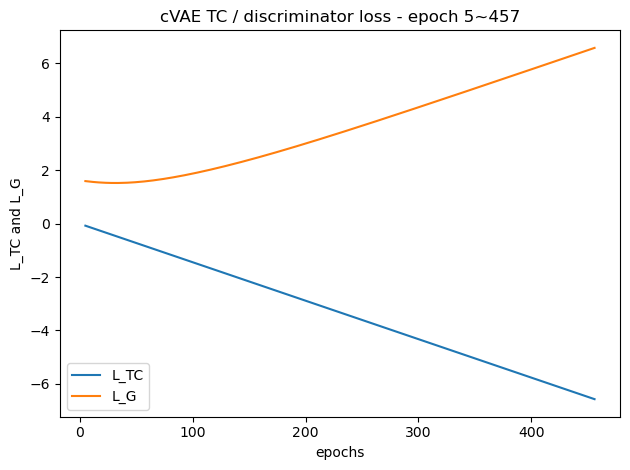

In [25]:
## 'TC_loss', gamma=100
gamma=100
## 'discriminator_loss'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'L_TC and L_G')

# ax2 = ax1.twinx()
# lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})', color='g')
# ax2.set_ylabel(f'L_TC * gamma({gamma})')

# # add legend
# lns = lns1+lns2+lns3
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc=3)
ax1.legend(loc=3)

plt.title(f'cVAE TC / discriminator loss - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

In [26]:
print(train_history["discriminator_loss"][0])
print(train_history["discriminator_loss"][-1])
print(train_history["TC_loss"][0])
print(train_history["TC_loss"][-1])

1.6178430318832397
6.5731611251831055
-0.007049989886581898
-6.570361137390137


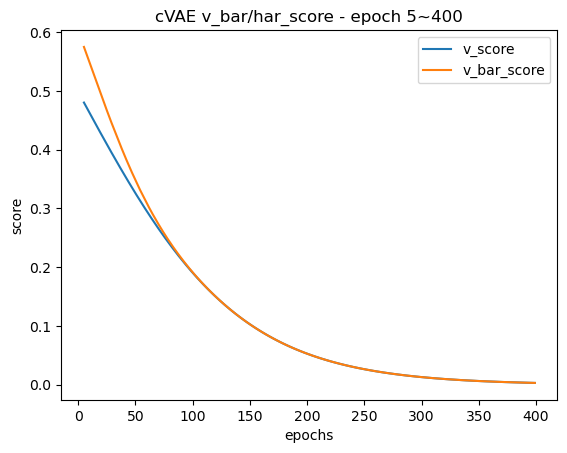

In [27]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = 400

plt.plot(epochs[left:right], v_bar_score[left:right], label=f'v_score')
plt.plot(epochs[left:right], v_hat_score[left:right], label=f'v_bar_score')

plt.title(f'cVAE v_bar/har_score - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

**! cVAE just force v_har_score and v_bar_score both approach 0**

## v acc

In [28]:
state_dict_path_2 = "3DcVAE_asd-UKBB604-dim32/2-ALL-train_480-val_120-HP-alpha_250000-beta_1-gamma_100-batch_size_10/model_last.pth"
state_dict_2 = torch.load(state_dict_path_2)

In [29]:
train_v_acc = state_dict_2["train_info_history"]["v_acc"]
train_v_bar_acc = state_dict_2["train_info_history"]["v_bar_acc"]
epoch2 = np.arange(0,len(train_v_acc))
len(epoch2)

107

In [30]:
len_diff = len(epochs)-len(epoch2)
v_ones = np.ones(len_diff).tolist()
v_zeros = np.zeros(len_diff).tolist()
train_v_bar_acc.extend(v_ones)
train_v_acc.extend(v_zeros)
len(train_v_acc)

457

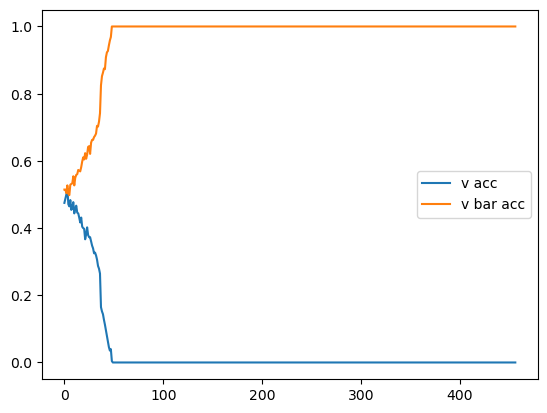

In [31]:
plt.plot(epochs, train_v_acc, label="v acc")
plt.plot(epochs, train_v_bar_acc, label="v bar acc")
plt.legend()

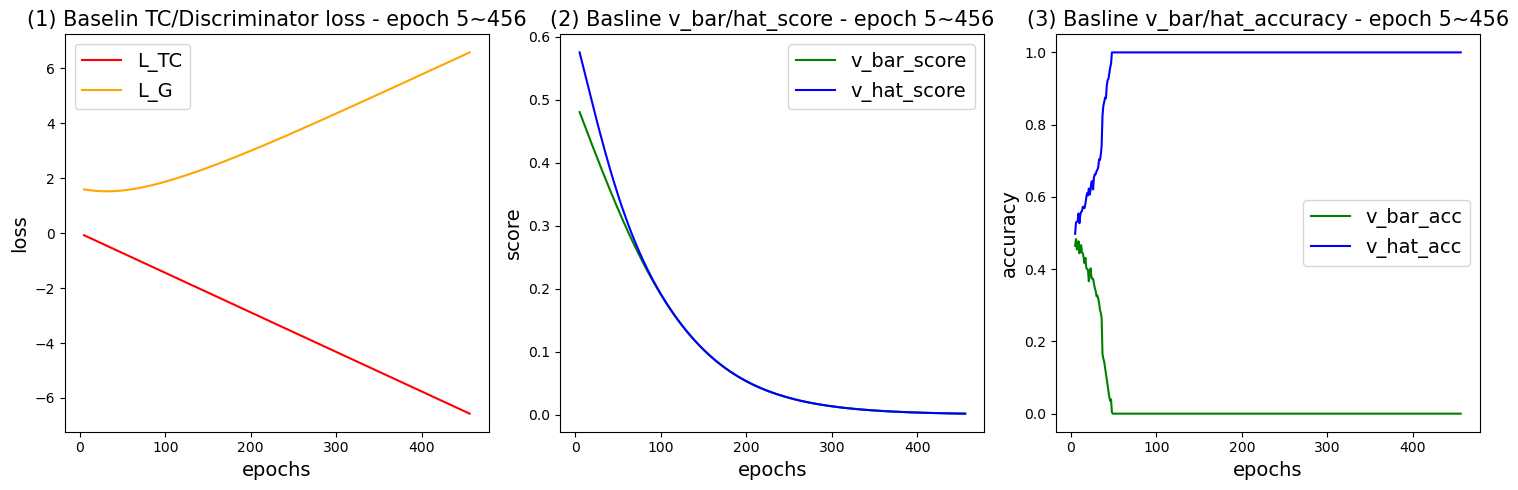

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 5))
title_size = 15
label_size = 14
legend_size = 14

left = 5
right = len(epochs)
ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC', color='r')
ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G', color='orange')
ax1.set_xlabel('epochs', fontsize=label_size)
ax1.set_ylabel(f'loss', fontsize=label_size)
ax1.set_title(f'(1) Baselin TC/Discriminator loss - epoch {left}~{right-1}', fontsize=title_size)
ax1.legend(loc="upper left", fontsize=legend_size)

left = 5
right = len(epochs)
ax2.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score', color='g')
ax2.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score', color='b')
ax2.set_title(f'(2) Basline v_bar/hat_score - epoch {left}~{right-1}', fontsize=title_size)
ax2.set_xlabel("epochs", fontsize=label_size)
ax2.set_ylabel("score", fontsize=label_size)
ax2.legend(fontsize=legend_size)

left = 5
right = len(epochs)
ax3.plot(epochs[left:right], train_v_acc[left:right], label="v_bar_acc", color='g')
ax3.plot(epochs[left:right], train_v_bar_acc[left:right], label="v_hat_acc", color='b')
ax3.set_title(f'(3) Basline v_bar/hat_accuracy - epoch {left}~{right-1}', fontsize=title_size)
ax3.set_xlabel("epochs", fontsize=label_size)
ax3.set_ylabel("accuracy", fontsize=label_size)
ax3.legend(fontsize=legend_size)

fig.tight_layout()
plt.savefig("./analysis/baseline-G")
plt.show()

## mean of each loss

In [33]:
left = 100
right = 200

print(f"mean of REC Loss: \t {(np.array(train_history['reconst_loss'])[left:right] / (160 * 192 * 160)).mean()}")
print(f"mean of KL Loss: \t {(np.array(train_history['KL_loss'])[left:right]).mean()}")
print(f"mean of TC Loss: \t {(np.array(train_history['TC_loss'])[left:right]).mean()}")
print(f"mean of G Loss: \t {(np.array(train_history['discriminator_loss'])[left:right]).mean()}")

mean of REC Loss: 	 0.0331994912147522
mean of KL Loss: 	 8.742028799057007
mean of TC Loss: 	 -2.1579898500442507
mean of G Loss: 	 2.3929803824424742


In [34]:
print(np.array(train_history['reconst_loss'])[1:20])
print(np.array(train_history['reconst_loss'])[390:410])

[1255114.5    1210777.5    1174209.25   1142455.75   1113648.25
 1085886.25   1059760.125  1035754.1875 1012840.25    990891.5
  969545.625   948833.75    928661.9375  908992.      889875.625
  871237.125   852984.25    835159.9375  817782.25  ]
[44653.2109375  44651.1015625  44644.76171875 44621.85546875
 44627.93359375 44634.69921875 44617.38671875 44642.63671875
 44630.4140625  44639.93359375 44619.8125     44600.6484375
 44624.21875    44603.9140625  44614.16796875 44602.96484375
 44628.1171875  44574.41796875 44585.125      44580.77734375]
